In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import pathlib as path
from pydub import AudioSegment
from pydub.utils import make_chunks
import wave
from scipy import signal

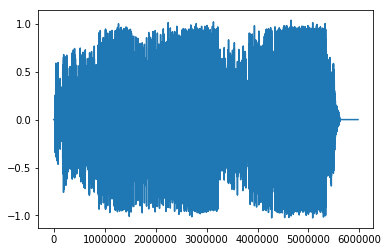

In [2]:
song = r"C:\Users\Mahip\Documents\girls_like_you.mp3"

y, sr = librosa.load(song)
plt.plot(y)

In [3]:
myaudio = AudioSegment.from_file(r"C:\Users\Mahip\Documents\girls_like_you.mp3") 
chunk_length_ms = 5000 # pydub calculates in millisec
chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of one sec

#Export all of the individual chunks as wav files
chunks_lists = []
for i, chunk in enumerate(chunks):
    chunk_name = "chunk{0}.wav".format(i)
    print ("exporting", chunk_name)
    chunk.export(chunk_name, format="wav")
    chunks_lists.append(chunk)


exporting chunk0.wav
exporting chunk1.wav
exporting chunk2.wav
exporting chunk3.wav
exporting chunk4.wav
exporting chunk5.wav
exporting chunk6.wav
exporting chunk7.wav
exporting chunk8.wav
exporting chunk9.wav
exporting chunk10.wav
exporting chunk11.wav
exporting chunk12.wav
exporting chunk13.wav
exporting chunk14.wav
exporting chunk15.wav
exporting chunk16.wav
exporting chunk17.wav
exporting chunk18.wav
exporting chunk19.wav
exporting chunk20.wav
exporting chunk21.wav
exporting chunk22.wav
exporting chunk23.wav
exporting chunk24.wav
exporting chunk25.wav
exporting chunk26.wav
exporting chunk27.wav
exporting chunk28.wav
exporting chunk29.wav
exporting chunk30.wav
exporting chunk31.wav
exporting chunk32.wav
exporting chunk33.wav
exporting chunk34.wav
exporting chunk35.wav
exporting chunk36.wav
exporting chunk37.wav
exporting chunk38.wav
exporting chunk39.wav
exporting chunk40.wav
exporting chunk41.wav
exporting chunk42.wav
exporting chunk43.wav
exporting chunk44.wav
exporting chunk45.wa

In [4]:
melspec = librosa.feature.melspectrogram(y)

In [5]:
melspec.shape

(128, 11665)

In [6]:
def Average(lst): 
    return sum(lst) / len(lst) 

In [7]:
obj = {}
for i in range(10):
    obj[i] = []

for i in range(10):
    for j in range(11665):
        obj[i].append(melspec[i][j])
     

In [8]:
len(obj)

10

In [9]:
meanobj = {}
for i in range(10):
    meanobj[i]=[]

In [10]:

for i, chunks in enumerate(chunks_lists):
    
    if i==54:
        break
    else:
        #Import chunk one at a time
        l_chunk = 'chunk{0}.wav'.format(i)
        x,sr1 = librosa.load(l_chunk)

        m_melspec = librosa.feature.melspectrogram(x)

        for i in range(10):
            for j in range(216):
                templist = []
                templist.append(m_melspec[i][j])
            avg = Average(templist)
            meanobj[i].append(avg)


In [11]:
len(meanobj)

10

In [14]:
def plot_and_corelate(array1 , array2):
    
    corr = signal.correlate(array1 , array2)
    
    fig,axs = plt.subplots(3,1)
    axs[0].plot(array1)
    axs[0].set_ylabel('Original')
    axs[1].plot(array2)
    axs[1].set_ylabel('Mean')
    axs[2].plot(corr)
    axs[2].set_ylabel('correlation')
    



In [15]:
def convvert_to_nparray(obj , obj1):
    for i in range(len(obj)):
        obj[i]=np.array(obj[i])
        
    for i in range(len(obj1)):
        obj1[i]=np.array(obj1[i])

In [16]:
convvert_to_nparray(obj , meanobj)

In [18]:
type(obj[0])

numpy.ndarray

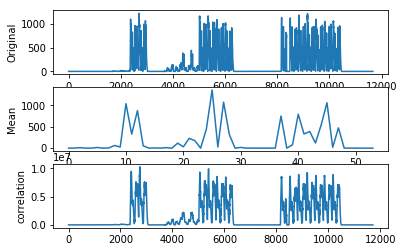

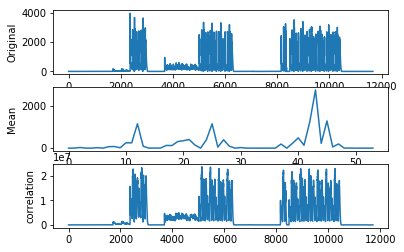

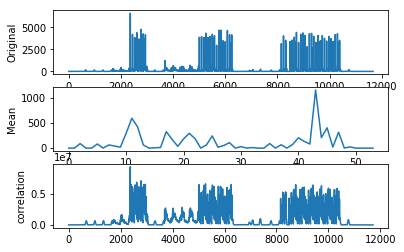

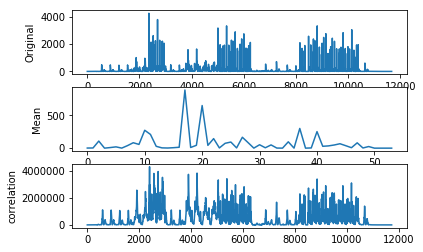

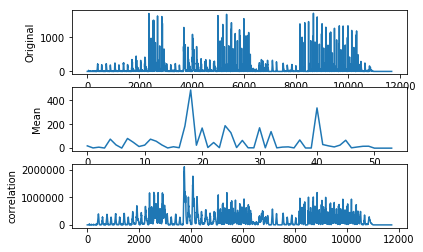

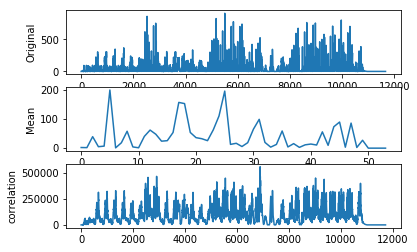

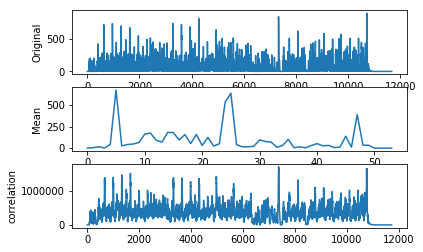

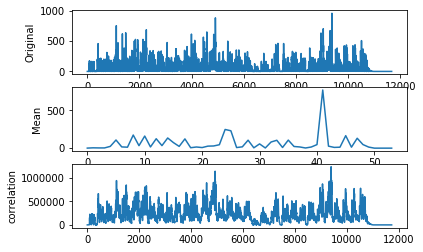

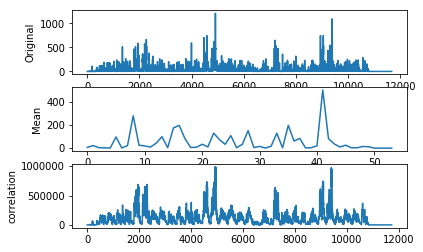

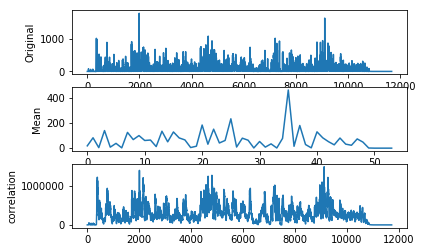

In [22]:
for i in range(10):
    plot_and_corelate(obj[i] , meanobj[i])
    plt.show()
    print("\n \n \n \n \n ")